In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import random

In [3]:
# Set a random seed for reproducibility
np.random.seed(18)

# Define the means for three clusters
means = [[2, 2], [8, 3], [3, 6]]

# Define the covariance matrix; an identity matrix indicates uncorrelated variables
cov = [[1, 0], [0, 1]]

# Set the number of data points to generate for each cluster
N = 500

# Generate data points for the first cluster (X0)
X0 = np.random.multivariate_normal(means[0], cov, N)

# Generate data points for the second cluster (X1)
X1 = np.random.multivariate_normal(means[1], cov, N)

# Generate data points for the third cluster (X2)
X2 = np.random.multivariate_normal(means[2], cov, N)

# Concatenate the data points from all three clusters into a single dataset (X)
X = np.concatenate((X0, X1, X2), axis=0)

# Set the number of clusters (K)
K = 3

# Assign labels to the data points based on the clusters
original_label = np.asarray([0] * N + [1] * N + [2] * N).T


In [4]:
X

array([[2.07942844, 4.19020236],
       [1.86510785, 2.16051798],
       [2.44269784, 2.62339144],
       ...,
       [2.60566241, 6.46771143],
       [4.67763675, 5.55463181],
       [3.62801566, 6.63056534]])

In [13]:
def kmeans_init_centroids(X, k):
    # Select 'k' random data points from the input dataset as initial centroids
    return X[np.random.choice(X.shape[0], k, replace = False)]

In [6]:
def kmeans_assign_labels(X, centroids):
    # Calculate the distance matrix 'D' using the cdist function
    D = cdist(X, centroids) 
    # For each data point, find the index of the nearest centroid (cluster)
    return np.argmin(D, axis=1)


In [7]:
def has_converged(centroids, new_centroids):
    # Check if the new centroids are the same as the previous centroids
    # by comparing their sets  
    # Convert the 'centroids' and 'new_centroids' arrays into sets of tuples
    # This allows us to perform set comparison to check for convergence
    # If the sets are the same, it means the centroids haven't changed, and convergence has been reached
    
    # Return 'True' if the sets are the same (convergence achieved), 'False' otherwise
    return set(tuple(a) for a in centroids) == set(tuple(a) for a in new_centroids)


In [9]:
import numpy as np

def kmeans_update_centroids(X, labels, K):
    centroids = np.zeros((K, X.shape[1]))
    
    # Iterate through each cluster (K) to compute new centroids
    for k in range(K):
        # Select the data points that belong to the current cluster (label k)
        Xk = X[labels == k, :]
        
        # Calculate the mean (average) of the data points in the cluster along each dimension
        # This results in a new centroid for the current cluster
        centroids[k, :] = np.mean(Xk, axis=0)
    return centroids


In [14]:
def k_means(X, K):
    # Initialize centroids using kmeans_init_centroids function
    centroids = [kmeans_init_centroids(X, K)]
    
    # Initialize an empty list to store cluster labels for each iteration
    labels = []
    
    # Initialize an iteration counter
    it = 0
    
    # Start the main K-Means iteration loop
    while True:
        # Assign data points to the current centroids using kmeans_assign_labels function
        labels.append(kmeans_assign_labels(X, centroids[-1]))
        
        # Calculate new centroids based on the current cluster assignments using kmeans_update_centroids
        new_centroids = kmeans_update_centroids(X, labels[-1], K)
        
        # Check for convergence using the has_converged function
        if has_converged(centroids[-1], new_centroids):
            break  # If converged, exit the loop
        
        # If not converged, update centroids and continue the loop
        centroids.append(new_centroids)
        it += 1  # Increment the iteration counter
    
    # Return a tuple containing the final centroids, cluster labels, and the number of iterations
    return (centroids, labels, it)


In [16]:
centroids, labels, it = k_means(X, K)
print('Centers found by our algorithm: \n', centroids[-1])

Centers found by our algorithm: 
 [[1.9834967  1.96588127]
 [3.02702878 5.95686115]
 [8.07476866 3.01494931]]


In [17]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit_learn:')
print(model.cluster_centers_)
pred_label = model.predict(X)

Centers found by scikit_learn:
[[3.02801296 5.96081708]
 [8.07476866 3.01494931]
 [1.98459808 1.96989964]]


/Users/admin/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# K-Means with MNIST dataset

In [20]:
from __future__ import print_function
import numpy as np
from sklearn.datasets import fetch_openml

In [22]:
data_dir = '../../data'
mnist = fetch_openml('mnist_784', version=1)
print('shape of mnist data: ', mnist.data.shape)

/Users/admin/miniconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


shape of mnist data:  (70000, 784)


In [29]:
np.random.choice(mnist.data.shape[0], N)

array([52709, 47854, 43807, ...,  2024, 32444,  2673])

In [32]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
K = 10
N = 10000
X = mnist.data.to_numpy()
X = X[np.random.choice(X.shape[0], N)]
kmeans = KMeans(n_clusters=K).fit(X)
pred_label = kmeans.predict(X)

/Users/admin/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# Object Segmentation

In [33]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

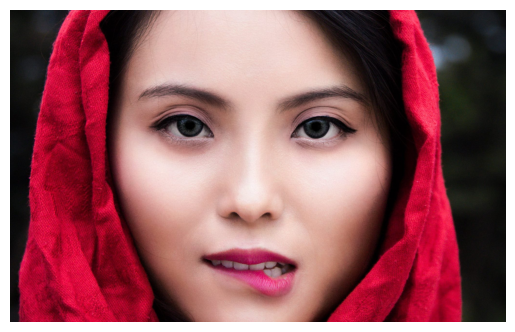

In [35]:
img = mpimg.imread('girl3.jpg')
# plt.imshow(img)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

In [36]:
img.shape

(1289, 2048, 3)

In [37]:
X = img.reshape((img.shape[0]*img.shape[1], img.shape[2]))

In [38]:
X.shape

(2639872, 3)

/Users/admin/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/admin/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/admin/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/admin/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

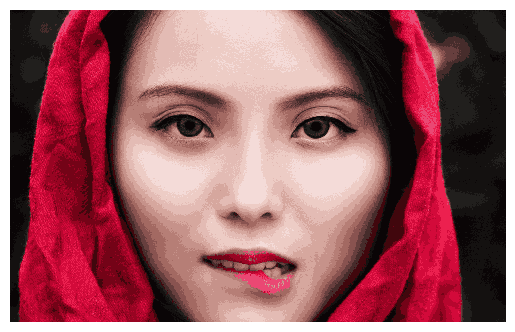

In [41]:
for K in [5,10,15,20]:
    kmeans = KMeans(n_clusters=K).fit(X)
    label = kmeans.predict(X)

img4 = np.zeros_like(X)

for k in range(K):
    img4[label == k] = kmeans.cluster_centers_[k]

img5 = img4.reshape((img.shape[0], img.shape[1], img.shape[2]))
plt.imshow(img5, interpolation='nearest')
plt.axis('off')
plt.show()